In [1]:
# Ejemplo "iris": mostrar como se pueden aplicar técnicas de machine learning para clasificar
#   diferentes tipos de flores de irir basándose en sus características medibles:
#   - Longitud de sépalo  - Ancho de sépalo  - Longitud de pétalo - Ancho de pétalo

In [2]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 8.3 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 7.3 MB/s eta 0:00:00:00:01
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.1
    Uninstalling numpy-2.1.1:
      Successfully uninstalled numpy-2.1.1

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [3]:
# Importamos las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# Paso 1: Carga de datos
# Cargamos el dataset Iris, que es un conjunto de datos incorporado en scikit-learn
iris = datasets.load_iris()
X = iris.data  # Características (atributos) de las flores
y = iris.target  # Etiquetas (especies de iris)

In [5]:
# Imprimimos información sobre el dataset
print("Información del dataset Iris:")
print(f"Número de muestras: {X.shape[0]}")
print(f"Número de características: {X.shape[1]}")
print(f"Clases: {np.unique(y)}")
print(f"Nombres de las características: {iris.feature_names}")
print(f"Nombres de las clases: {iris.target_names}")

Información del dataset Iris:
Número de muestras: 150
Número de características: 4
Clases: [0 1 2]
Nombres de las características: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Nombres de las clases: ['setosa' 'versicolor' 'virginica']


In [7]:
# Paso 2: Preprocesamiento de datos
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nTamaño del conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño del conjunto de prueba:", X_test.shape[0])


Tamaño del conjunto de entrenamiento: 105
Tamaño del conjunto de prueba: 45


In [10]:
# Estandarizamos las características
# Esto es importante para muchos algoritmos de ML, incluyendo SVM
# Se acostumbra escalar las características para que los cálculos sean mas simples 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Paso 3: Selección y entrenamiento del modelo
# Usaremos un clasificador SVM (Support Vector Machine) con kernel RBF
svm_classifier = SVC(kernel='rbf', random_state=42)

In [13]:
# Entrenamos el modelo
svm_classifier.fit(X_train_scaled, y_train)

print("\nModelo SVM entrenado.")


Modelo SVM entrenado.


In [14]:
# Paso 4: Evaluación del modelo
# Hacemos predicciones en el conjunto de prueba
y_pred = svm_classifier.predict(X_test_scaled)

In [15]:
# Calculamos y mostramos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:")
print(cm)


Matriz de confusión:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [16]:
# Mostramos el informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Informe de clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



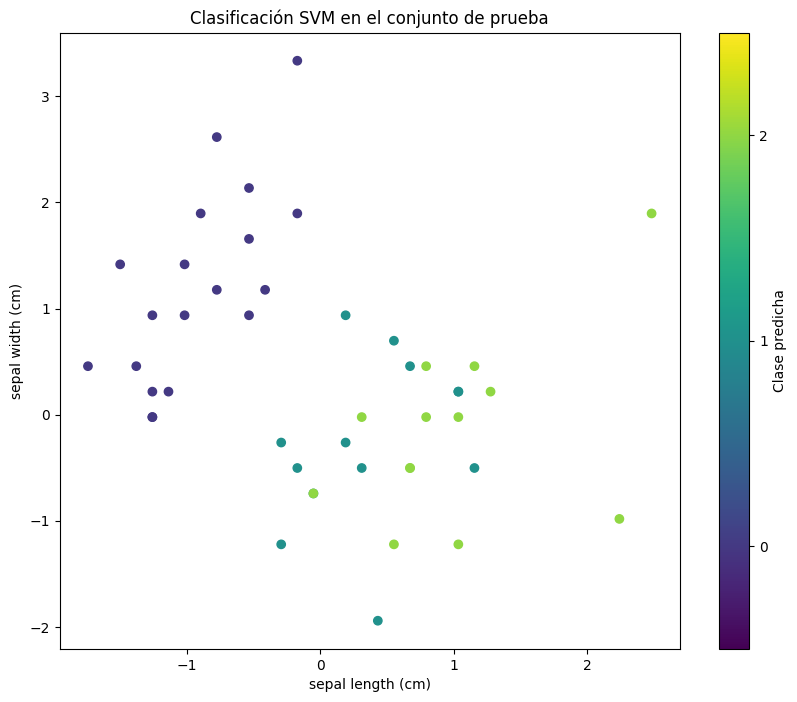

In [17]:
# Paso 5: Visualización (opcional)
# Visualizamos la separación de clases en las dos primeras características
plt.figure(figsize=(10, 8))
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Clasificación SVM en el conjunto de prueba')
plt.colorbar(ticks=range(3), label='Clase predicha')
plt.clim(-0.5, 2.5)
plt.show()

In [18]:
# Paso 6: Interpretación
print("\nInterpretación de los resultados:")
print("1. El modelo SVM ha logrado una buena separación de las clases, como se puede ver en la visualización.")
print("2. La matriz de confusión muestra cuántas muestras de cada clase fueron clasificadas correctamente o incorrectamente.")
print("3. El informe de clasificación proporciona métricas detalladas por clase, incluyendo precisión, recall y F1-score.")
print("4. La precisión global del modelo se puede calcular como la suma de la diagonal principal de la matriz de confusión dividida por el total de muestras.")

accuracy = np.sum(np.diag(cm)) / np.sum(cm)
print(f"\nPrecisión global del modelo: {accuracy:.2f}")


Interpretación de los resultados:
1. El modelo SVM ha logrado una buena separación de las clases, como se puede ver en la visualización.
2. La matriz de confusión muestra cuántas muestras de cada clase fueron clasificadas correctamente o incorrectamente.
3. El informe de clasificación proporciona métricas detalladas por clase, incluyendo precisión, recall y F1-score.
4. La precisión global del modelo se puede calcular como la suma de la diagonal principal de la matriz de confusión dividida por el total de muestras.

Precisión global del modelo: 1.00
